### Working notebook to test possible implementations and applications of a Hampel Filters in the analysis toolkit

In [5]:
import numpy as np
import sys
sys.path.append('../')
import heartbeat as hb
import matplotlib.pyplot as plt

[346. 345. 349. ... 338. 337. 341.]


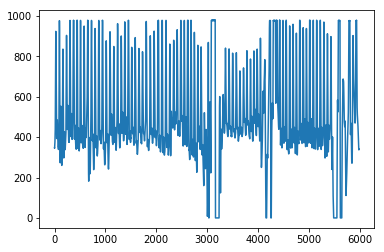

In [64]:
data = hb.get_data('pp8_Som_Ven_C0_data.txt')[:,1]

print(data)

plt.plot(data)
plt.show()

In [114]:
def MAD(data):
    '''function to compute median absolute deviation of data slice
       https://en.wikipedia.org/wiki/Median_absolute_deviation
    
    keyword arguments:
    - data: 1-dimensional numpy array containing data
    '''
    med = np.median(data)
    return np.median(np.abs(data - med))

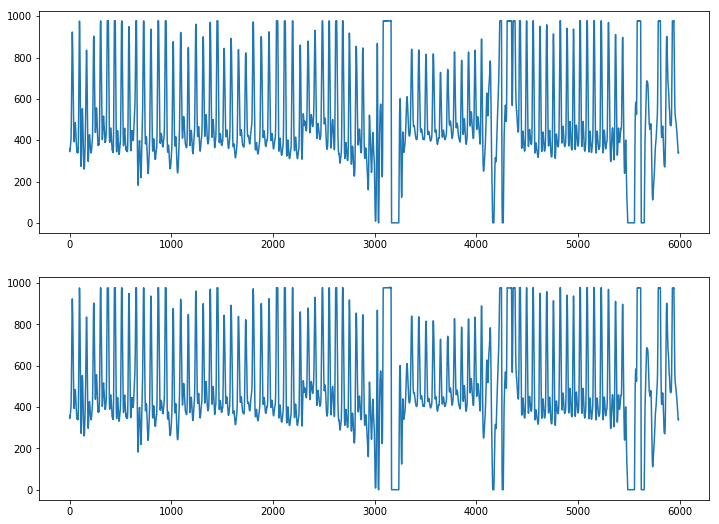

In [115]:
#let's explore the MAD result given the signal
filtsize = 6
onesided_filt = filtsize // 2
madarray = []
for i in range(onesided_filt, len(data) - onesided_filt - 1):
    mad = MAD(data[i - onesided_filt : i + onesided_filt])
    madarray.append(mad)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(data)
plt.subplot(212)
plt.plot(hampelfilt(data))
plt.show()

In [116]:
def hampelfilt(data, filtsize=6):
    '''function to detect outliers based on hampel filter
       filter takes datapoint and six surrounding samples.
       Detect outliers based on being more than 3std from window mean
    
    keyword arguments:
    - data: 1-dimensional numpy array containing data
    - filtsize: the filter size expressed the number of datapoints
                taken surrounding the analysed datapoint. a filtsize
                of 6 means three datapoints on each side are taken.
                total filtersize is thus filtsize + 1 (datapoint evaluated)
    '''
    datatmp = [x for x in data]
    onesided_filt = filtsize // 2
    madarray = [0 for x in range(0, onesided_filt)]
    for i in range(onesided_filt, len(data) - onesided_filt - 1):
        dataslice = datatmp[i - onesided_filt : i + onesided_filt]
        mad = MAD(dataslice)
        median = np.median(dataslice)
        if datatmp[i] > median + (3 * mad):
            #print('%s, %s' %(datatmp[i], 3 * mad))
            datatmp[i] = median
    return datatmp

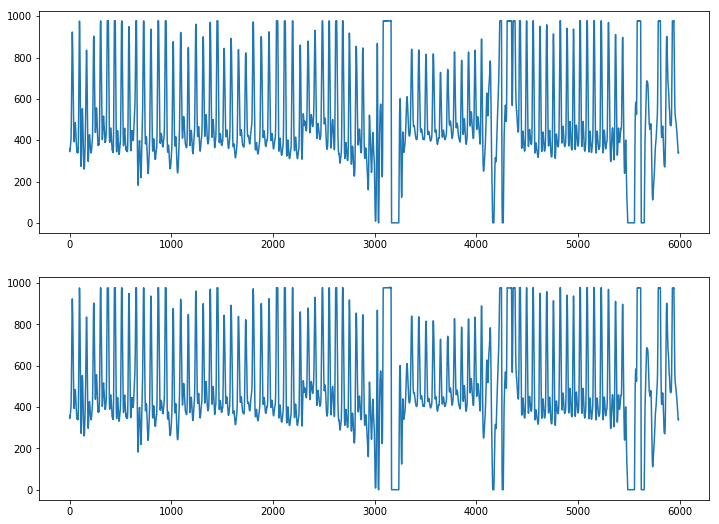

In [117]:
filtereddata = hampelfilt(data, filtsize=6)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(data)
plt.subplot(212)
plt.plot(filtereddata)
plt.show()

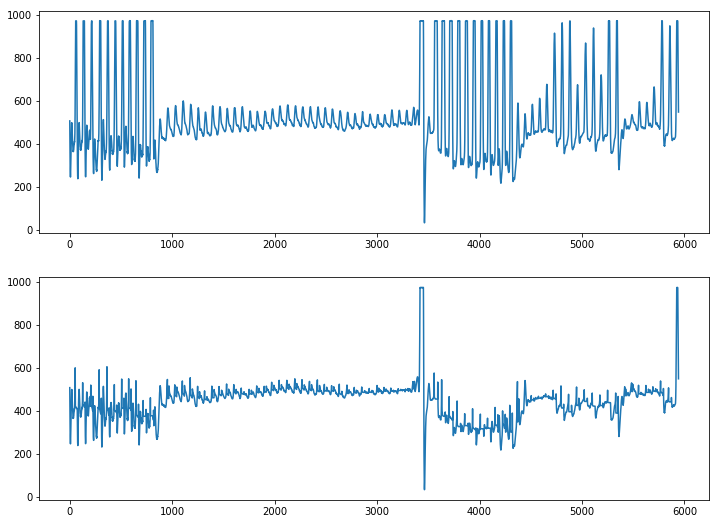

In [127]:
newdata = hb.get_data('amplitudevar.txt')[:,1]

newfiltereddata = hampelfilt(newdata, filtsize=100)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(newdata)
plt.subplot(212)
plt.plot(newfiltereddata)
plt.show()

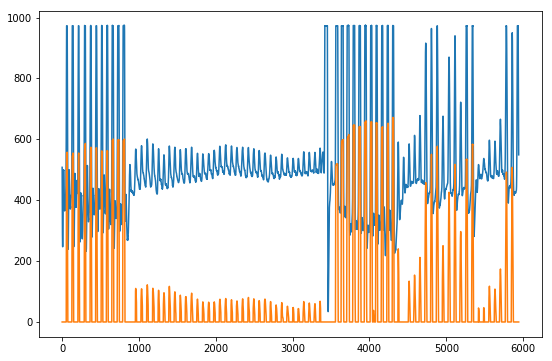

In [119]:
diff = newdata - newfiltereddata

plt.figure(figsize=(9,6))
plt.plot(newdata)
plt.plot(diff)
plt.show()

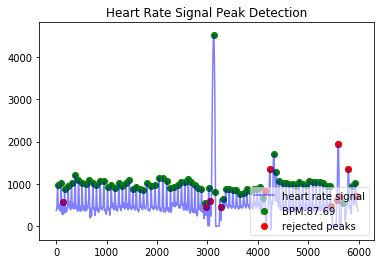

current full approach took: 0.1470872803365637 sec
new pre-processing approach took: 0.9081531991896554 sec
[700.0, 710.0, 670.0, 700.0, 680.0, 690.0, 720.0, 710.0, 730.0, 710.0, 720.0, 730.0, 750.0, 740.0, 750.0, 740.0, 720.0, 700.0, 680.0, 680.0, 690.0, 720.0, 720.0, 730.0, 790.0, 760.0, 780.0, 770.0, 770.0, 760.0, 770.0, 680.0, 720.0, 660.0, 690.0, 650.0, 660.0, 680.0, 640.0, 650.0, 360.0, 460.0, 700.0, 700.0, 720.0, 710.0, 710.0, 670.0, 700.0, 680.0, 630.0, 650.0, 520.0, 510.0, 600.0, 670.0, 630.0, 690.0, 660.0, 660.0, 660.0, 680.0, 630.0, 650.0, 690.0, 680.0, 700.0, 720.0, 700.0, 700.0, 620.0]
[690.0, 710.0, 680.0, 760.0, 670.0, 650.0, 700.0, 740.0, 710.0, 700.0, 760.0, 740.0, 700.0, 740.0, 750.0, 740.0, 730.0, 690.0, 740.0, 620.0, 690.0, 720.0, 720.0, 730.0, 790.0, 760.0, 800.0, 800.0, 750.0, 730.0, 770.0, 680.0, 750.0, 660.0, 720.0, 610.0, 640.0, 680.0, 640.0, 700.0, 730.0, 710.0, 710.0, 660.0, 700.0, 680.0, 640.0, 640.0, 630.0, 680.0, 660.0, 660.0, 660.0, 680.0, 630.0, 680.0, 6

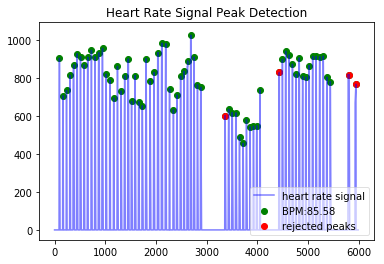

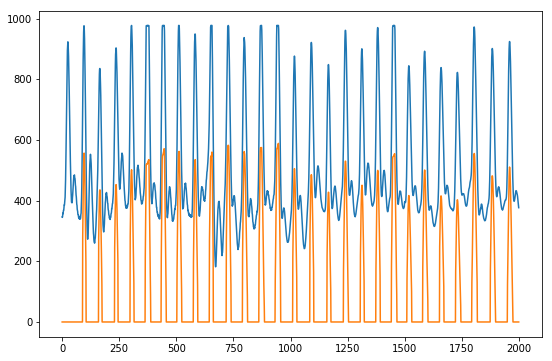

In [124]:
import time
fs = 100.0

t1 = time.clock()
measures = hb.process(data, 100.0)
hb.plotter()
t_total = time.clock() - t1

print('current full approach took: %s sec' %t_total)

t1 = time.clock()
diff2 = data - hampelfilt(data, filtsize = int(measures['bpm']))
t_total = time.clock() - t1

print('new pre-processing approach took: %s sec' %t_total)

print(hb.working_data['RR_list_cor'])
m = hb.process(diff2, 100.0)
print(hb.working_data['RR_list_cor'])
hb.plotter()

plt.figure(figsize=(9,6))
plt.plot(data[0:2000])
plt.plot(diff2[0:2000])
plt.show()

took: 28.493873287723886 sec


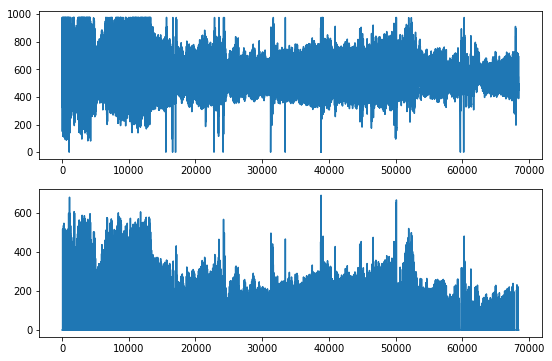

In [102]:
data3 = hb.get_data('../data3.csv', column_name='hr')

fs = hb.get_samplerate_datetime(hb.get_data('../data3.csv', column_name='datetime'),
                             timeformat='%Y-%m-%d %H:%M:%S.%f')

t1 = time.clock()
diff3 = data3 - hampelfilt(data3, filtsize = 80)
t_total = time.clock() - t1

print('took: %s sec' %t_total)

plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(data3)
plt.subplot(212)
plt.plot(diff3)
plt.show()